In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
data = pd.read_csv(r"/home/seth/Downloads/utility/hourly_electricity_data.csv",                                                      parse_dates=['period'],
                   index_col='period',
                   )

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4848 entries, 2024-04-06 00:00:00 to 2023-12-28 23:30:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   current    4848 non-null   float64
 1   average    0 non-null      float64
 2   efficient  0 non-null      float64
dtypes: float64(3)
memory usage: 151.5 KB


In [4]:
data.describe()

/home/seth/anaconda3/envs/intel-python-new/lib/python3.10/site-packages/pandas/io/formats/format.py:1595: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/home/seth/anaconda3/envs/intel-python-new/lib/python3.10/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/home/seth/anaconda3/envs/intel-python-new/lib/python3.10/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,current,average,efficient
count,4848.000000,0.0,0.0
mean,0.269083,NaN,NaN
std,0.283079,NaN,NaN
min,0.000000,NaN,NaN
25%,0.139000,NaN,NaN
50%,0.177000,NaN,NaN
75%,0.230000,NaN,NaN
max,2.603000,NaN,NaN


In [5]:
data.drop(columns=["average", "efficient"], inplace=True)

In [6]:
data.sample(10)

,current
period,
2024-04-03 04:30:00,0.185
2024-01-12 23:00:00,0.773
2024-01-26 08:30:00,0.108
2024-03-31 14:00:00,0.105
2024-02-13 11:00:00,0.203
2024-03-05 23:30:00,0.158
2024-04-01 07:30:00,0.127
2024-01-10 09:00:00,0.948
2024-03-22 21:00:00,0.080


In [7]:
# Resample the data to daily frequency
daily_data = data.resample('D')

# Calculate min, max, average
min_current = daily_data['current'].min()
max_current = daily_data['current'].max()
avg_current = daily_data['current'].mean()

time_min_current = daily_data['current'].idxmin()
time_max_current = daily_data['current'].idxmax()

# Calculate the difference between current and previous row
data['diff'] = data['current'].diff()

data['diff'].fillna(value=-1, inplace=True)

# Set a threshold for peak (here it's set to 1 as an example, adjust according to your data)
threshold = 0.2

# Find the times when the difference is greater than the threshold
peak_indices = data.index[data['diff'] > threshold]

# Create a dictionary to store peak values and their times for each day
peak_values = {}
peak_times = {}

for peak_index in peak_indices:
    date = peak_index.date()
    if date not in peak_values:
        peak_values[date] = []
        peak_times[date] = []
    peak_values[date].append(data.loc[peak_index, 'current'])
    peak_times[date].append(peak_index.time())

# Store the results in a DataFrame
result = pd.DataFrame({
    'min_current': min_current,
    'time_min_current': time_min_current,
    'max_current': max_current,
    'time_max_current': time_max_current,
    'avg_current': avg_current,
})

result['peak_values'] = pd.Series(peak_values)
result['peak_times'] = pd.Series(peak_times)

In [8]:
data.head()

,current,diff
period,,
2024-04-06 00:00:00,0.181,-1.000
2024-04-06 00:30:00,0.199,0.018
2024-04-06 01:00:00,0.175,-0.024
2024-04-06 01:30:00,0.157,-0.018
2024-04-06 02:00:00,0.117,-0.040


In [9]:
result.head()

,min_current,time_min_current,max_current,time_max_current,avg_current,peak_values,peak_times
period,,,,,,,
2023-12-28,0.115,2023-12-28 08:00:00,1.307,2023-12-28 20:00:00,0.294750,"[0.755, 1.181, 0.9, 1.281, 0.979, 1.307]","[01:00:00, 04:00:00, 09:30:00, 18:00:00, 19:30..."
2023-12-29,0.083,2023-12-29 08:00:00,1.563,2023-12-29 22:30:00,0.247167,"[1.061, 0.796, 0.673, 1.563]","[04:30:00, 07:00:00, 18:30:00, 22:30:00]"
2023-12-30,0.088,2023-12-30 17:00:00,0.947,2023-12-30 09:30:00,0.255333,"[0.568, 0.865, 0.947, 0.527, 0.475, 0.832, 0.764]","[02:00:00, 07:30:00, 09:30:00, 11:30:00, 18:00..."
2023-12-31,0.105,2023-12-31 22:30:00,1.195,2023-12-31 00:30:00,0.244771,"[0.848, 1.195, 1.079, 0.73, 0.663]","[00:00:00, 00:30:00, 04:30:00, 06:30:00, 20:30..."
2024-01-01,0.109,2024-01-01 15:30:00,1.166,2024-01-01 09:00:00,0.318146,"[0.819, 0.881, 0.838, 1.166, 0.954, 1.081, 0.9...","[01:30:00, 02:30:00, 05:00:00, 09:00:00, 16:30..."


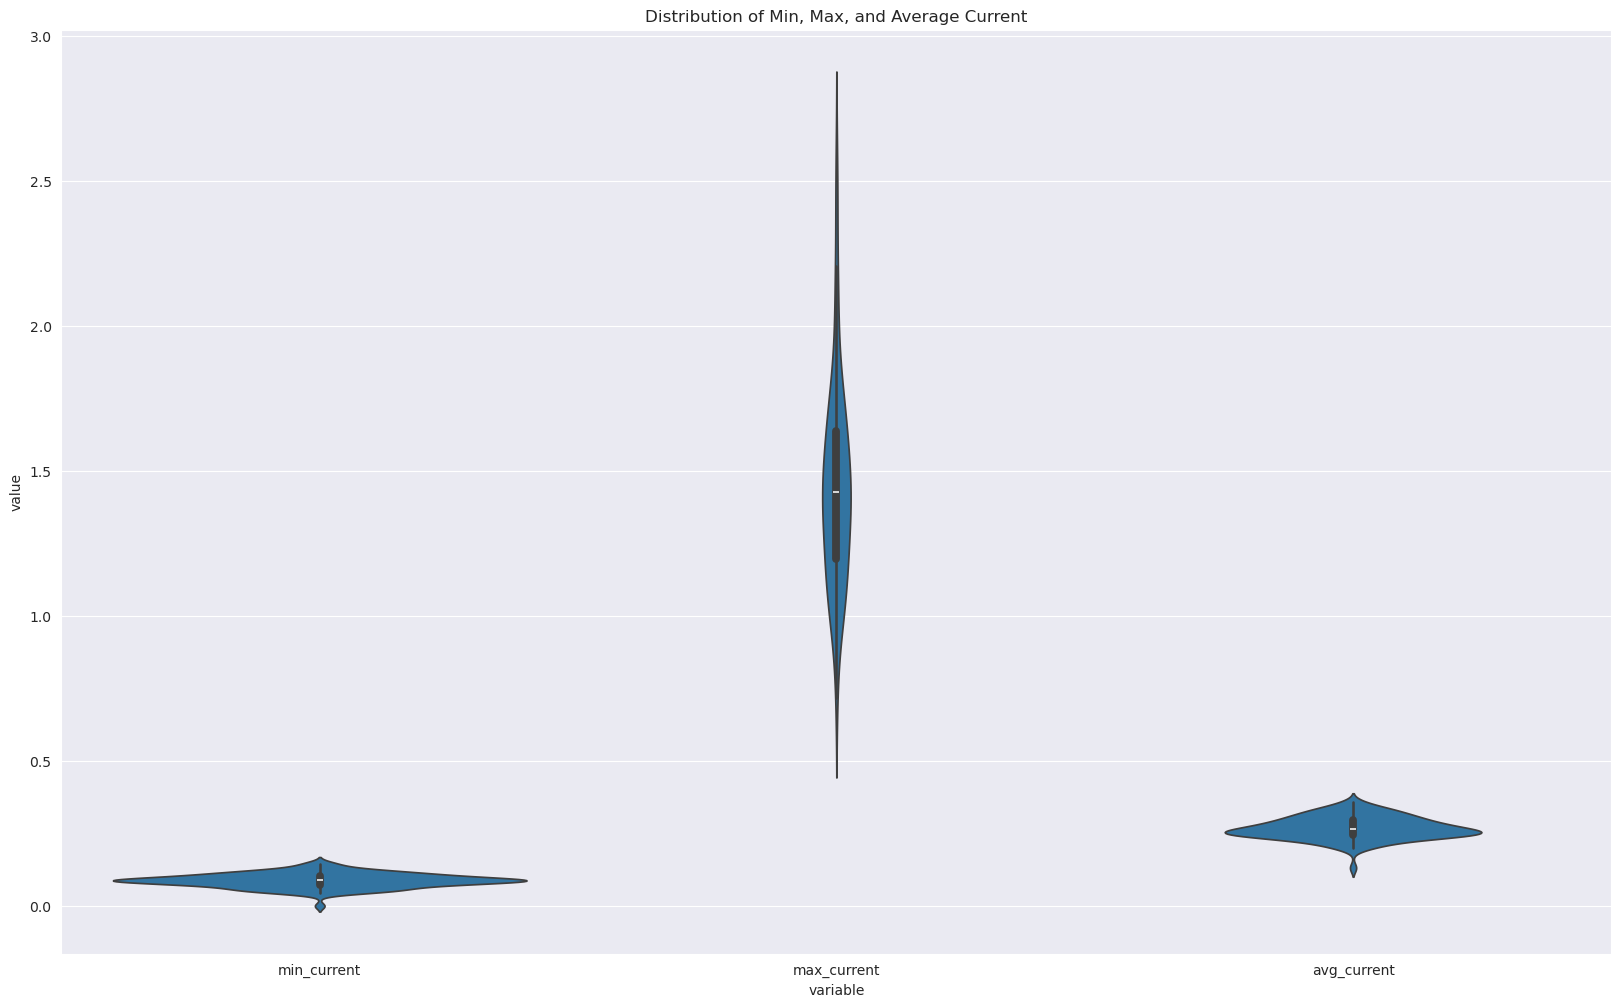

In [10]:
reshaped_result = result.melt(value_vars=['min_current', 'max_current', 'avg_current'],
                              var_name='variable', value_name='value')

plt.figure(figsize=(20, 12))
sns.violinplot(x='variable', y='value', data=reshaped_result)
plt.title('Distribution of Min, Max, and Average Current')
plt.show()

/tmp/ipykernel_52533/3595457139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['time_min_current'] = pd.to_datetime(time_data['time_min_current']).dt.time
/tmp/ipykernel_52533/3595457139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data['time_max_current'] = pd.to_datetime(time_data['time_max_current']).dt.time


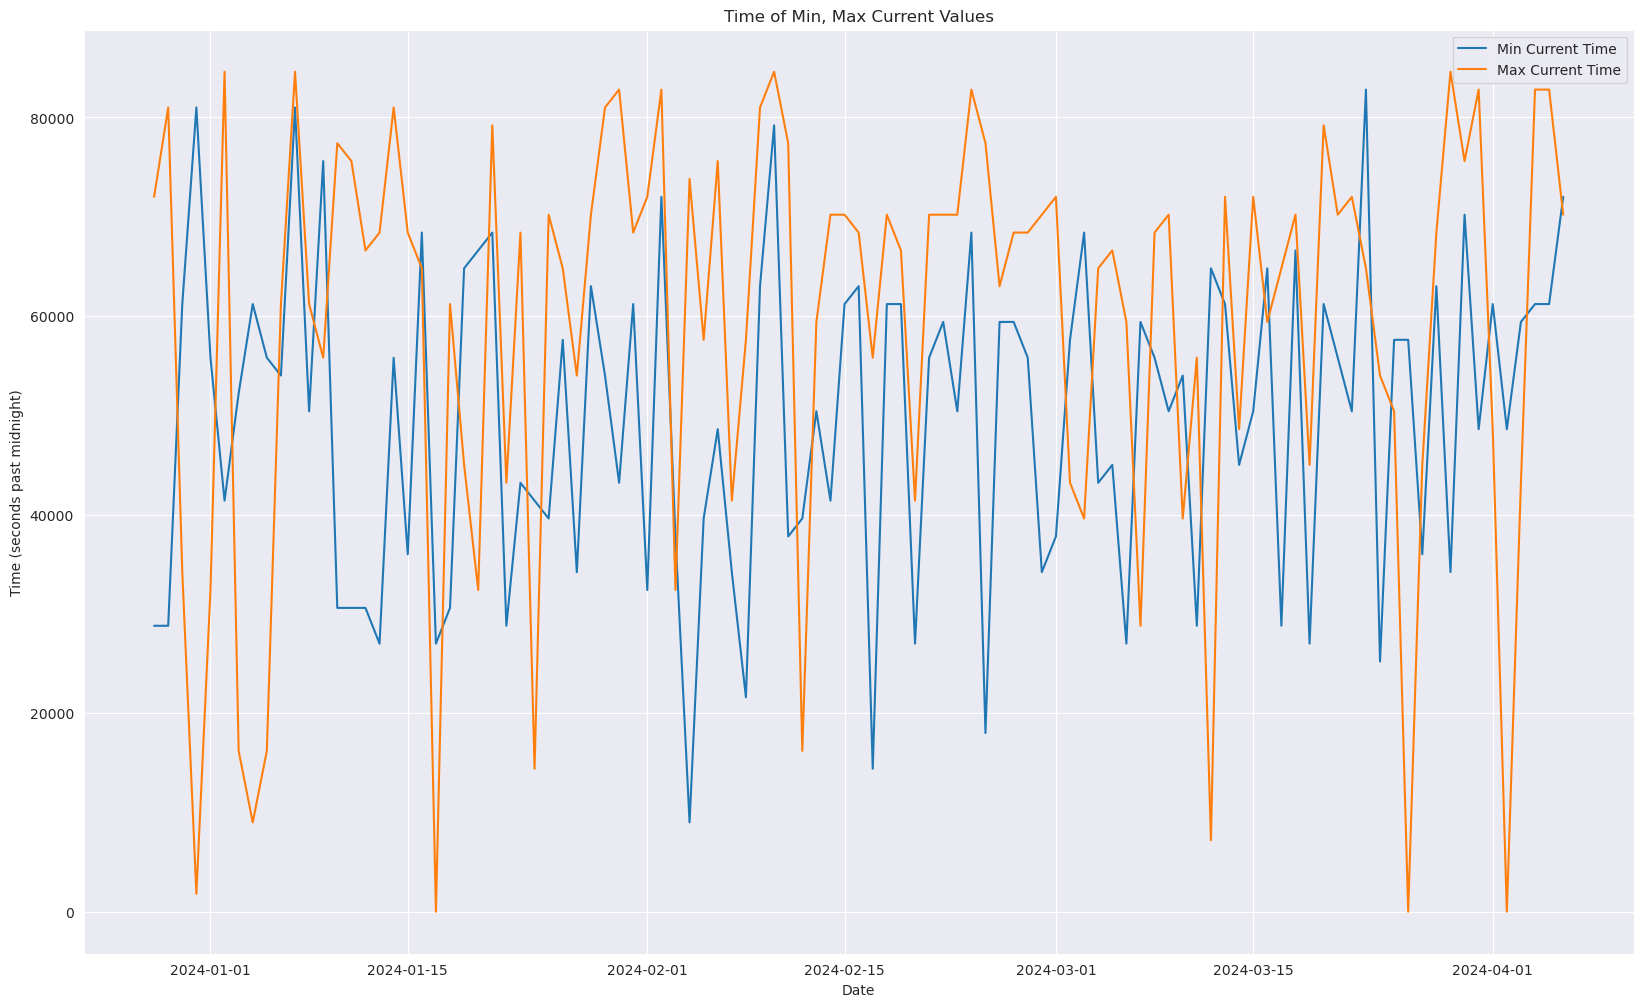

In [11]:
time_data = result[['time_min_current', 'time_max_current']]

# Convert time to a suitable format for plotting
time_data['time_min_current'] = pd.to_datetime(time_data['time_min_current']).dt.time
time_data['time_max_current'] = pd.to_datetime(time_data['time_max_current']).dt.time

# Convert time to a suitable format for plotting
time_data.loc[:, 'time_min_current'] = time_data['time_min_current'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second)
time_data.loc[:, 'time_max_current'] = time_data['time_max_current'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second)

# Plotting
plt.figure(figsize=(20, 12))

# Plot min, max, and average times
plt.plot(time_data.index, time_data['time_min_current'], label='Min Current Time')
plt.plot(time_data.index, time_data['time_max_current'], label='Max Current Time')

plt.xlabel('Date')
plt.ylabel('Time (seconds past midnight)')
plt.title('Time of Min, Max Current Values')
plt.legend()

plt.show()

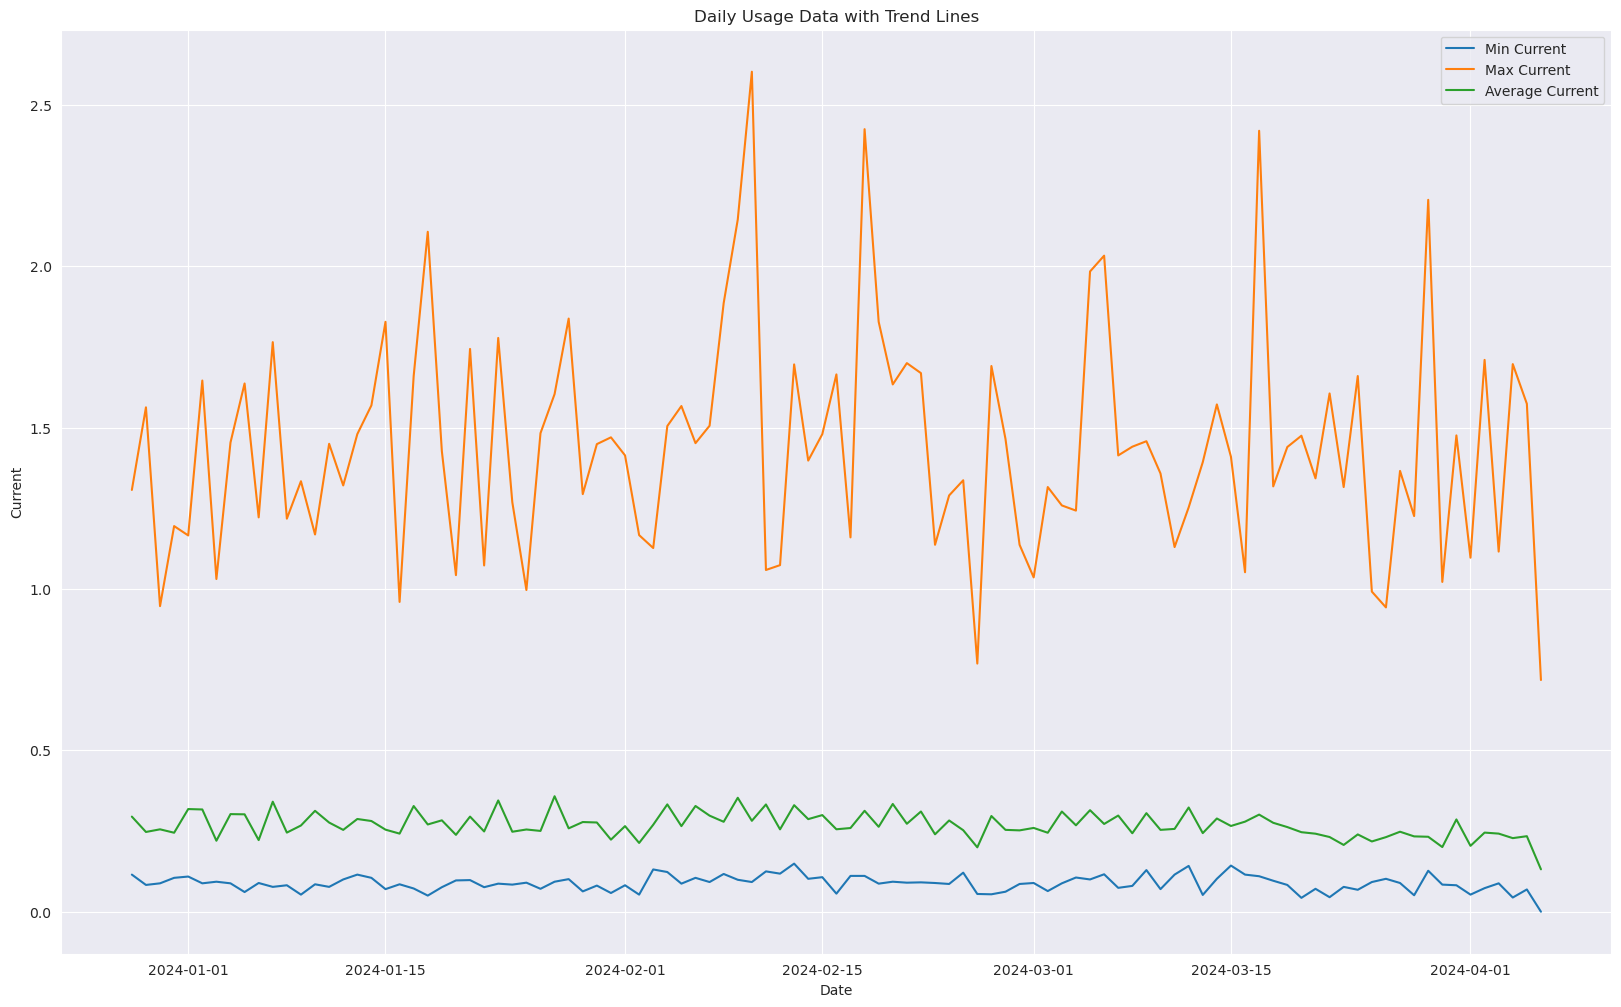

In [13]:
# Plotting
plt.figure(figsize=(20, 12))

# Plot the original data
plt.plot(result.index, result['min_current'], label='Min Current')
plt.plot(result.index, result['max_current'], label='Max Current')
plt.plot(result.index, result['avg_current'], label='Average Current')

plt.xlabel('Date')
plt.ylabel('Current')
plt.title('Daily Usage Data with Trend Lines')
plt.legend()

plt.show()